In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2022-06-26 17:22:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 74.125.196.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   186MB/s    in 0.6s    

2022-06-26 17:22:36 (186 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
from zipfile import ZipFile

zipped = ZipFile("pizza_steak.zip", "r")
zipped.extractall()
zipped.close()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os

def dir_specs(root):
  for path, dirs, files in os.walk(root):
    print(f"There are {len(dirs)} directories and {len(files)} images in '{path}'.")

In [ ]:
dir_specs("pizza_steak")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
len(os.listdir("pizza_steak/train/pizza"))

750

In [ ]:
import pathlib

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = f"{target_dir}/{target_class}"
  random_image = random.choice(os.listdir(target_folder))
  
  img = mpimg.imread(target_folder + "/" + random_image)
  plt.imshow(img)
  # plt.axis(False)
  plt.title(target_class)
  plt.xlabel("Shape: " + str(img.shape))

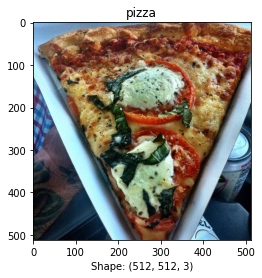

In [ ]:
view_random_image("pizza_steak/train", "pizza")

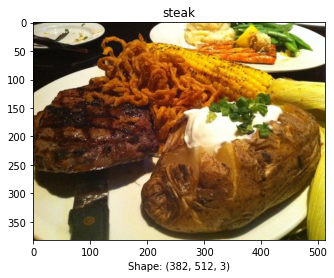

In [ ]:
view_random_image("pizza_steak/train", "steak")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary")

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
EPOCHS = 5
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=(3, 3),
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=EPOCHS,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 224ms/step - loss: 0.5792 - accuracy: 0.6900 - val_loss: 0.5229 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4537 - accuracy: 0.7967 - val_loss: 0.3747 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4145 - accuracy: 0.8233 - val_loss: 0.3641 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3972 - accuracy: 0.8253 - val_loss: 0.3405 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3254 - accuracy: 0.8640 - val_loss: 0.3551 - val_accuracy: 0.8540


In [ ]:
def plot_history_curve(history):
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]
  epochs = np.arange(0, len(loss))
  plt.figure(figsize=(20, 7))
  plt.subplot(1, 2, 1)
  plt.title("EPOCHS - LOSS")
  plt.plot(epochs, loss)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.subplot(1, 2, 2)
  plt.title("EPOCHS - ACCURACY")
  plt.plot(epochs, accuracy)
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()

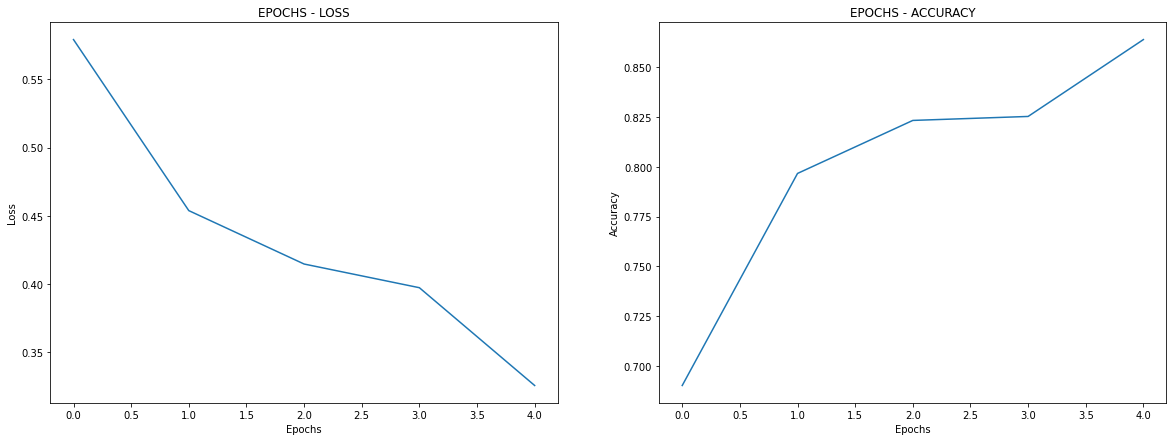

In [ ]:
plot_history_curve(history_1)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
augmented_datagen = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)

In [ ]:
aug_train_data = augmented_datagen.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode="binary")

aug_test_data = augmented_datagen.flow_from_directory(test_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Text(0.5, 1.0, 'Augmented')

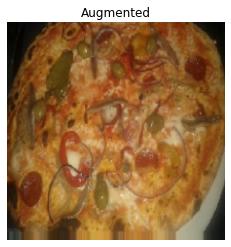

In [ ]:
plt.imshow(random.choice(aug_train_data.next()[0]))
plt.axis(False)
plt.title("Augmented")

In [ ]:
EPOCHS = 5
model_2 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_2 = model_2.fit(aug_train_data,
                        epochs=EPOCHS,
                        steps_per_epoch=len(aug_train_data),
                        validation_data=aug_test_data,
                        validation_steps=len(aug_test_data),
                        verbose=2)

Epoch 1/5
47/47 - 28s - loss: 0.6208 - accuracy: 0.6600 - val_loss: 0.5303 - val_accuracy: 0.7260 - 28s/epoch - 606ms/step
Epoch 2/5
47/47 - 27s - loss: 0.5114 - accuracy: 0.7573 - val_loss: 0.3965 - val_accuracy: 0.8320 - 27s/epoch - 574ms/step
Epoch 3/5
47/47 - 27s - loss: 0.4905 - accuracy: 0.7707 - val_loss: 0.4258 - val_accuracy: 0.8360 - 27s/epoch - 568ms/step
Epoch 4/5
47/47 - 27s - loss: 0.4840 - accuracy: 0.7667 - val_loss: 0.4335 - val_accuracy: 0.7960 - 27s/epoch - 571ms/step
Epoch 5/5
47/47 - 27s - loss: 0.4693 - accuracy: 0.7780 - val_loss: 0.3813 - val_accuracy: 0.8360 - 27s/epoch - 568ms/step


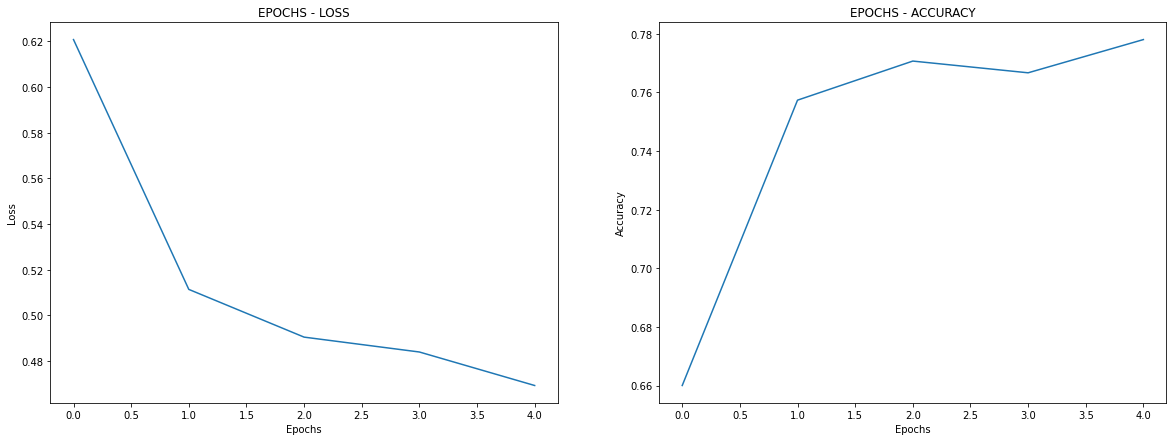

In [ ]:
plot_history_curve(history_2)

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 2s 141ms/step - loss: 0.3218 - accuracy: 0.8700


[0.32180336117744446, 0.8700000047683716]

--2022-06-26 17:28:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-06-26 17:28:42 (32.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



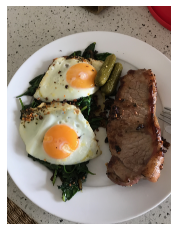

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# import and prepare image for predictions

def setup_image(filename, image_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [image_shape, image_shape])
  img /= 255.
  img = tf.expand_dims(img, axis=0)
  return img

In [ ]:
pred_steak = setup_image("03-steak.jpeg")
pred_steak

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
sample_pred = model_2.predict(pred_steak)
sample_pred

array([[0.8525619]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(sample_pred[0][0]))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  img = setup_image(filename)
  pred = model.predict(img)
  pred_class = class_names[int(tf.round(sample_pred[0][0]))]
  plt.imshow(img[0])
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

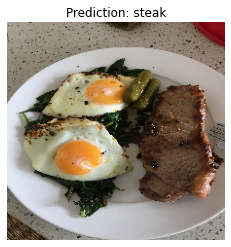

In [ ]:
pred_and_plot(model_2, "03-steak.jpeg", class_names)

--2022-06-26 17:43:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-06-26 17:43:35 (42.1 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]



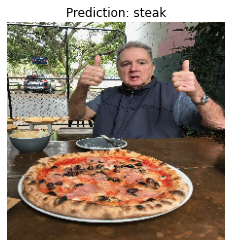

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_2, "03-pizza-dad.jpeg", class_names)